In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Reshape, Flatten, Input
from tensorflow.keras.optimizers import RMSprop
import numpy as np
from tensorflow.keras.models import load_model

IMG_SHAPE = (28, 28, 1)

# Build the Generator
def build_generator():
    model = Sequential()
    
    model.add(Dense(128, activation="relu", input_shape=(100,)))
    model.add(Dense(np.prod(IMG_SHAPE), activation="tanh"))
    model.add(Reshape(IMG_SHAPE))
    
    return model

# Build the Discriminator
def build_discriminator():
    model = Sequential()
    
    model.add(Flatten(input_shape=IMG_SHAPE))
    model.add(Dense(128))
    model.add(LeakyReLU(0.2))
    model.add(Dense(1, activation="sigmoid"))
    
    return model

generator = build_generator()
discriminator = build_discriminator()

optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0002)

# Compile Discriminator
discriminator.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Combined Model
z = Input(shape=(100,))
img = generator(z)
discriminator.trainable = False
validity = discriminator(img)

combined = Model(z, validity)
combined.compile(optimizer=optimizer, loss="binary_crossentropy")

def train_gan(generator, discriminator, combined, data, epochs, batch_size=128):
    real_label_smooth = np.ones((batch_size, 1)) * 0.9
    fake_label_smooth = np.zeros((batch_size, 1)) * 0.1

    for epoch in range(epochs):
        idx = np.random.randint(0, data.shape[0], batch_size)
        real_imgs = data[idx]

        noise = np.random.normal(0, 1, (batch_size, 100))
        generated_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_imgs, real_label_smooth)
        d_loss_fake = discriminator.train_on_batch(generated_imgs, fake_label_smooth)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = combined.train_on_batch(noise, real_label_smooth)

        print(f"{epoch}/{epochs} [D loss: {d_loss[0]} | D accuracy: {100*d_loss[1]}] [G loss: {g_loss}]")

(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 127.5 - 1.
x_train = np.expand_dims(x_train, axis=-1)

train_gan(generator, discriminator, combined, x_train, epochs=100)

4/4 [==============================] - 0s 2ms/step
0/1000 [D loss: 0.6352792084217072 | D accuracy: 13.28125] [G loss: 0.611449122428894]
4/4 [==============================] - 0s 1ms/step
1/1000 [D loss: 0.6666728258132935 | D accuracy: 9.765625] [G loss: 0.6021779775619507]
4/4 [==============================] - 0s 1ms/step
2/1000 [D loss: 0.6313014328479767 | D accuracy: 5.859375] [G loss: 0.5800978541374207]
4/4 [==============================] - 0s 1ms/step
3/1000 [D loss: 0.6350598484277725 | D accuracy: 7.8125] [G loss: 0.5995028614997864]
4/4 [==============================] - 0s 1ms/step
4/1000 [D loss: 0.6356674283742905 | D accuracy: 6.640625] [G loss: 0.5687973499298096]
4/4 [==============================] - 0s 1ms/step
5/1000 [D loss: 0.6528234481811523 | D accuracy: 5.46875] [G loss: 0.5859009623527527]
4/4 [==============================] - 0s 1ms/step
6/1000 [D loss: 0.6334169059991837 | D accuracy: 3.515625] [G loss: 0.5845887660980225]
4/4 [==========================

In [4]:
noise_dim = 100
noise = np.random.normal(0, 1, (1, noise_dim))

In [5]:
generated_image = generator.predict(noise)

1/1 [==============================] - 0s 32ms/step


In [6]:
generator.save('path_to_saved_generator.keras')

In [7]:
generator = load_model('path_to_saved_generator.keras')

In [8]:
!ls -lh

total 1280
-rw-r--r--  1 isabel  staff   172K 20 Aug 11:26 Untitled.ipynb
-rw-r--r--  1 isabel  staff   2.6K 15 Aug 19:34 app.py
-rw-r--r--  1 isabel  staff   457K 20 Aug 11:26 path_to_saved_generator.keras


In [9]:
from tensorflow.keras.models import load_model
generator = load_model('path_to_saved_generator.keras')

1/1 [==============================] - 0s 8ms/step


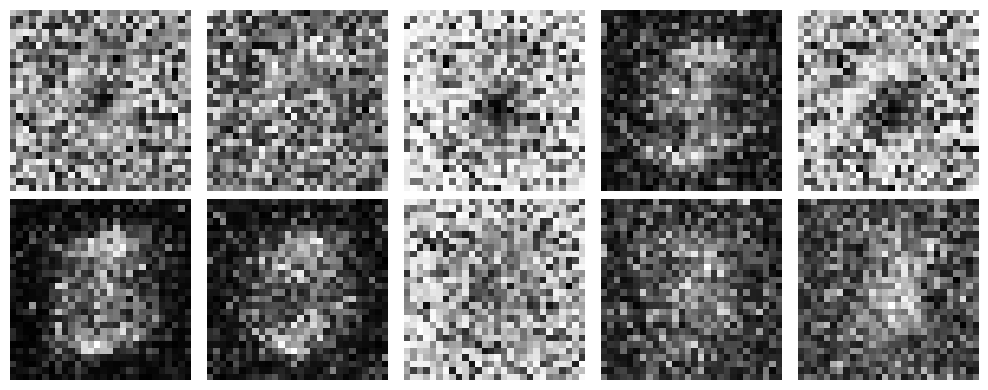

In [10]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(10, 4))

for i in range(2):
    for j in range(5):
        noise = np.random.normal(0, 1, (1, 100))
        generated_image = generator.predict(noise)
        axs[i,j].imshow(generated_image[0, :, :, 0], cmap='gray')
        axs[i,j].axis('off')

plt.tight_layout()
plt.show()
